In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get the data

In [2]:
data = pd.read_csv("olympics2024.csv")
df = pd.DataFrame(data=data)
df

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
...,...,...,...,...,...,...,...
86,84,Peru,PER,0,0,1,1
87,84,Qatar,QAT,0,0,1,1
88,84,Singapore,SIN,0,0,1,1
89,84,Slovakia,SVK,0,0,1,1


# Data wrangling

In [3]:
df.isnull().sum()

Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

In [73]:
# Showing how many unique values exist in each column in the dataset
df.nunique()

Rank            63
Country         91
Country Code    91
Gold            18
Silver          16
Bronze          19
Total           27
dtype: int64

In [5]:
# It is irrelavant to keep country or contry code as they both represent the same idea.
# In this case we will keep the country names and remove the country code.
new_df = df.drop('Country Code', axis=1)
new_df = new_df.reset_index(drop=True)

In [6]:
new_df

,Rank,Country,Gold,Silver,Bronze,Total
0,1,United States,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France,16,26,22,64
...,...,...,...,...,...,...
86,84,Peru,0,0,1,1
87,84,Qatar,0,0,1,1
88,84,Singapore,0,0,1,1
89,84,Slovakia,0,0,1,1


In [7]:
# Gold medals
new_df['first'] = new_df['Gold'].apply(lambda x: x > 0)
# Silevr medals
new_df['Second'] = new_df['Silver'].apply(lambda x: x > 0)
# Bronz medals
new_df['Third'] = new_df['Bronze'].apply(lambda x: x > 0)

In [8]:
new_df

,Rank,Country,Gold,Silver,Bronze,Total,first,Second,Third
0,1,United States,40,44,42,126,True,True,True
1,2,China,40,27,24,91,True,True,True
2,3,Japan,20,12,13,45,True,True,True
3,4,Australia,18,19,16,53,True,True,True
4,5,France,16,26,22,64,True,True,True
...,...,...,...,...,...,...,...,...,...
86,84,Peru,0,0,1,1,False,False,True
87,84,Qatar,0,0,1,1,False,False,True
88,84,Singapore,0,0,1,1,False,False,True
89,84,Slovakia,0,0,1,1,False,False,True


# Data Visualization

In [16]:
# Filter DataFrames for countries with at least one of each medalin deacending order
gold_df = new_df[new_df['first']].sort_values(by='Gold', ascending=False)
silver_df = new_df[new_df['Second']].sort_values(by='Silver', ascending=False)
bronze_df = new_df[new_df['Third']].sort_values(by='Bronze', ascending=False)

In [50]:
# Obtaining the different proportion of medals
gold = gold_df['Gold'].sum()
silver = silver_df['Silver'].sum()
bronze = bronze_df['Bronze'].sum()

328 327 384 1039


## Distribution of Medal Types Across All Competitions

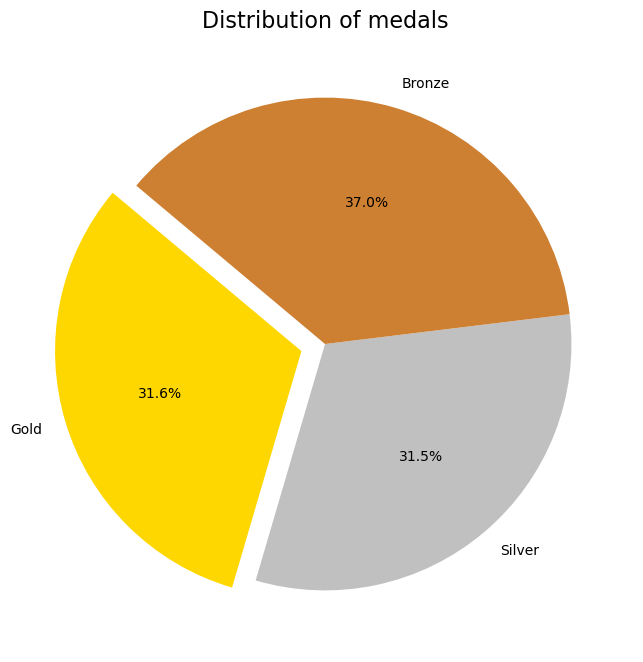

In [56]:
medals = [gold, silver, bronze]
names  = ['Gold', 'Silver', 'Bronze']
color  = ['gold', 'silver', '#CD7F32']

plt.figure(figsize=(8, 8))
plt.pie(medals, labels=names, colors=color, startangle=140, autopct='%1.1f%%', explode=(0.1, 0, 0))
plt.title("Distribution of medals", fontsize=16)
plt.show()

## Distribution of Total Medals Across Countries

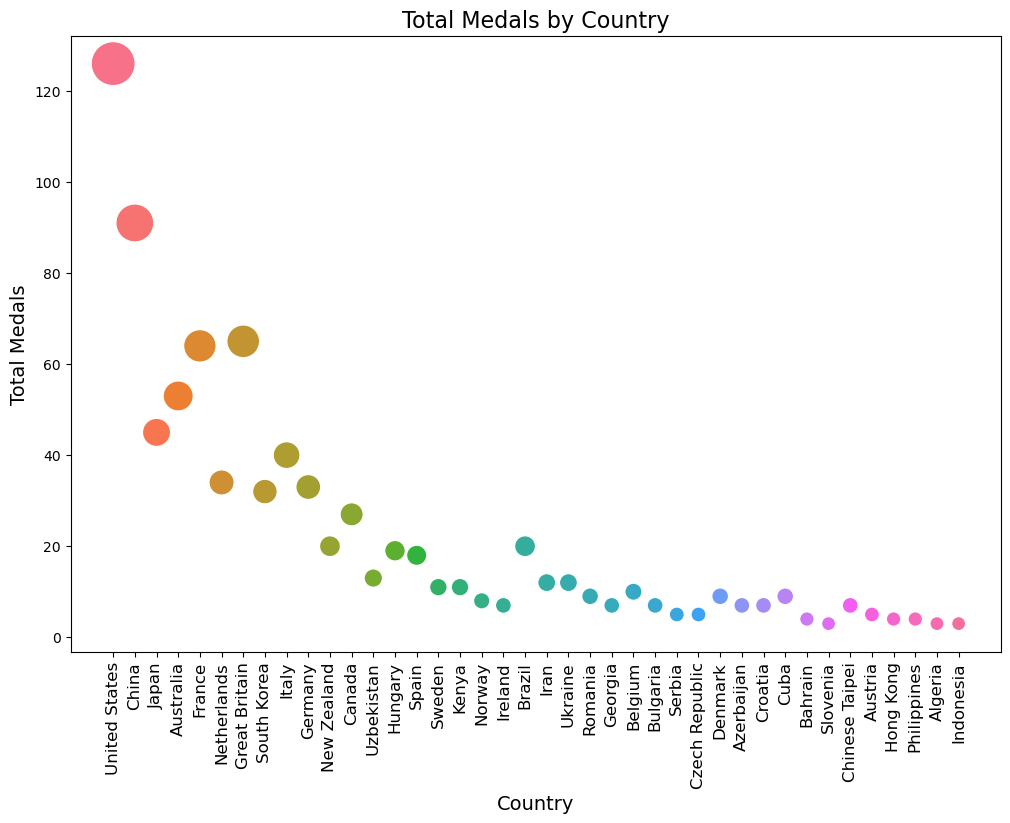

In [59]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=new_df.head(40), x='Country', y='Total', size='Total', sizes=(100, 1000), hue='Country', legend=False)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Medals', fontsize=14)
plt.title('Total Medals by Country', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.show()

# Medal Distribution by Country: Gold, Silver, and Bronze

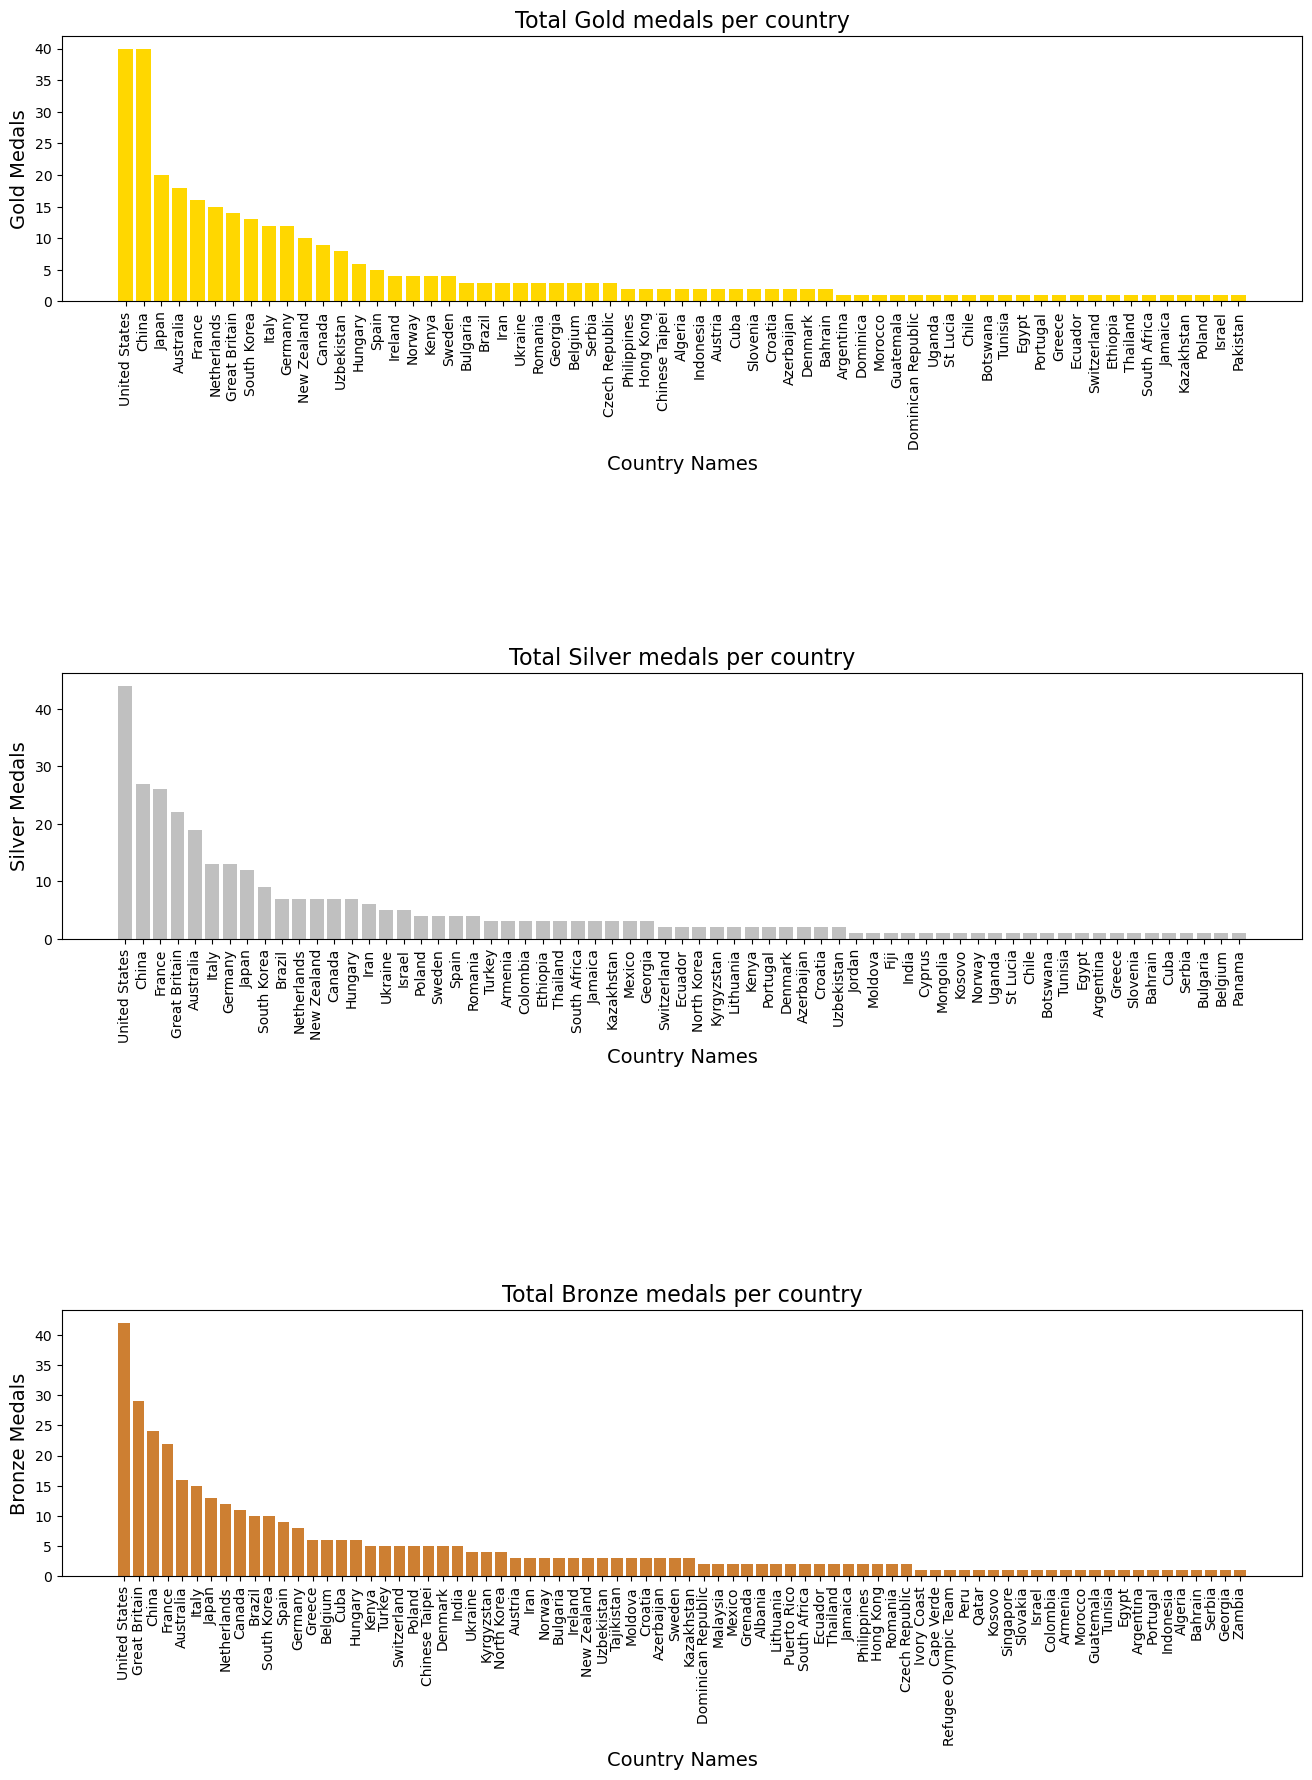

In [17]:
plt.figure(figsize=(16, 20))

plt.subplot(5, 1, 1)
plt.bar(gold_df['Country'], gold_df['Gold'], color='gold')
plt.title("Total Gold medals per country", fontsize=16)
plt.xlabel('Country Names', fontsize=14)
plt.ylabel('Gold Medals', fontsize=14)
plt.xticks(rotation=90)

plt.subplot(5, 1, 3)
plt.bar(silver_df['Country'], silver_df['Silver'], color='silver')
plt.title("Total Silver medals per country", fontsize=16)
plt.xlabel('Country Names', fontsize=14)
plt.ylabel('Silver Medals', fontsize=14)
plt.xticks(rotation=90)

plt.subplot(5, 1, 5)
plt.bar(bronze_df['Country'], bronze_df['Bronze'], color='#CD7F32')
plt.title("Total Bronze medals per country", fontsize=16)
plt.xlabel('Country Names', fontsize=14)
plt.ylabel('Bronze Medals', fontsize=14)
plt.xticks(rotation=90)

plt.show()

# Conclusion

### Based on the data visualizations provided:  
- **United States** leads with a total of 126 medals, demonstrating a strong performance across all medal types. This is reflected in the bar charts, where the United States consistently appears at the top for gold, silver, and bronze medals.  
- **China** follows with a significant count of 91 medals. While China also performs strongly, the breakdown of the medal types shows that the country excels particularly in certain categories, as highlighted by the individual bar charts for gold, silver, and bronze medals.  
### The pie chart further illustrates the overall distribution of medal types, with gold medals comprising a substantial portion of the total count, indicating a high level of achievement in first-place finishes.  
- The **United States** not only leads in the overall count of medals but also shows a balanced distribution across gold, silver, and bronze medals. This indicates a consistently high performance across various events.  
- **China’s** strong performance is evident, though the distribution of medal types may differ slightly from that of the United States. This suggests areas of excellence and potential focus in specific categories.
### Overall, these visualizations provide a comprehensive view of the medal distribution, highlighting the dominance of top-performing countries and the relative success across different medal types.